In [1]:
# Try to Get the images ==> Feeding Keras with our own dataset

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import PIL
import os
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from keras.utils import np_utils

In [56]:
path1 = "E:\Python\Deep Learning\Tensorflow-Bootcamp-master\Gesture Reco. Project\images\class1A"
path2 = "E:\Python\Deep Learning\Tensorflow-Bootcamp-master\Gesture Reco. Project\images\class1A_resized"

In [65]:
images_files = os.listdir(path1)
images_samples = len(images_files)
print(images_samples)
img_width = 200
img_height = 200

1000


In [66]:
for file in images_files:    
    im = Image.open(path1 +  "\\" + file)
    img = im.resize((img_width , img_height))
    gray = img.convert('L')
    gray.save(path2 + "\\" + file , "PNG")

In [70]:
# Get the Resized & Gray Scale Images
images_resized = os.listdir(path2);
img_1 = np.array(Image.open(path2 + "\\" + images_resized[0])) # to get the Size of the Images
m , n = img_1.shape[0:2]
images_numbers = len(images_resized)

In [71]:
# Flatten the Images to store in Matrix
images_matrix = np.array([
    np.array(Image.open(path2 + "\\" + file)).flatten() for file in images_resized
], 'f')

In [72]:
images_matrix.shape

(1000, 40000)

In [73]:
label_classA = np.ones((images_samples,),dtype= int)

In [74]:
data , label = shuffle(images_matrix , label_classA ,random_state = 2)

In [77]:
train_data = [data , label]
%matplotlib inline

Data Shape :  (1000, 40000)
Labels Shape : (1000,)


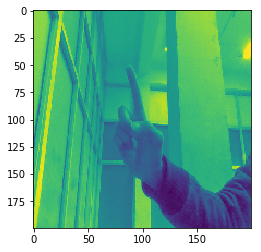

In [86]:
image_sample = images_matrix[800].reshape(img_width , img_height)
print( "Data Shape : ", train_data[0].shape)
print("Labels Shape :" , train_data[1].shape)
plt.imshow(image_sample)

In [97]:
# Make the Train and Test Dataset
(X ,Y) = (train_data[0] , train_data[1])


X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=4)


X_train = X_train.reshape(X_train.shape[0] , 1 , img_width , img_height)
X_test = X_test.reshape(X_test.shape[0] , 1 , img_width , img_height)

In [103]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
nb_classes = 10 # For the Softmax fo the 10 Gesture but I use now just 1 class
# Convert vectors to matrices
Y_train = np_utils.to_categorical(y_train , nb_classes)
Y_test = np_utils.to_categorical(y_test , nb_classes)

X_train Shape :  (800, 1, 200, 200)
X_test Shape :  (200, 1, 200, 200)
X_test Shape :  (800, 10)
X_test Shape :  (200, 10)


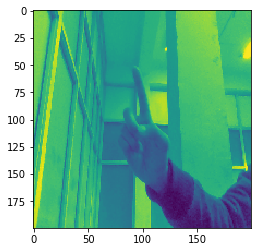

In [106]:
plt.imshow(X_train[185 , 0] , interpolation='nearest')

# Size of train and test matrices
print("X_train Shape : ",X_train.shape)
print("X_test Shape : " , X_test.shape)
print("X_test Shape : " , Y_train.shape)
print("X_test Shape : " , Y_test.shape)